# Submitted By:- Sagar Purswani(purswanisagar60@gmail.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on Customers.csv

In [2]:
cust_df = pd.read_csv('Customers.csv')
cust_df.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
cust_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [5]:
cust_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
cust_df.duplicated().sum()

0

In [7]:
cust_df.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

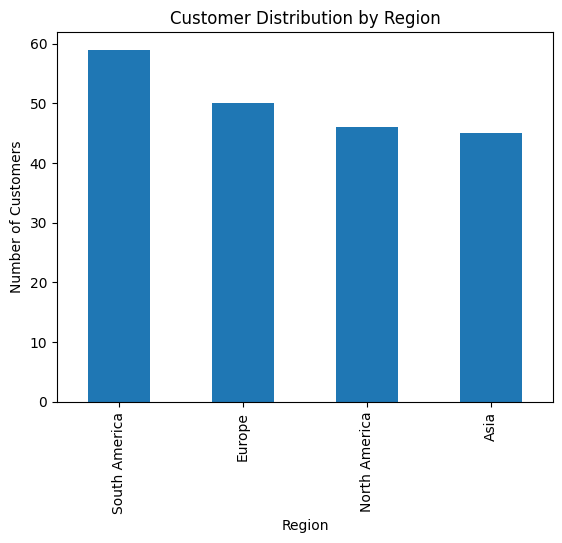

In [8]:
# Plot customer distribution by region
cust_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

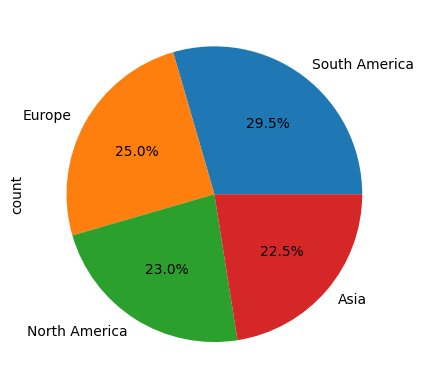

In [9]:
cust_df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

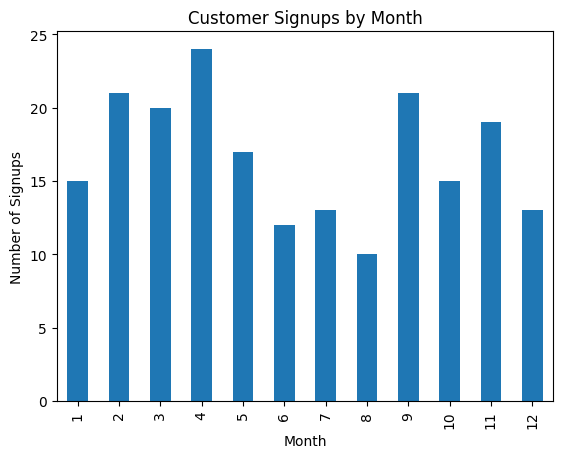

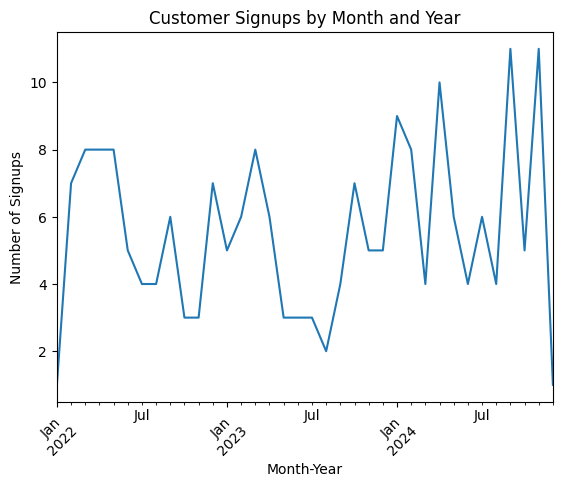

In [10]:
# Extract the month and year from the signup date
cust_df['SignupDate'] = pd.to_datetime(cust_df['SignupDate'], errors='coerce')
cust_df['SignupMonth'] = cust_df['SignupDate'].dt.month
cust_df['SignupMonthYear'] = cust_df['SignupDate'].dt.to_period('M')
# Extract the year from SignupDate
cust_df['SignupYear'] = cust_df['SignupDate'].dt.year


# Plot the distribution of customers by signup month
cust_df.groupby('SignupMonth').size().plot(kind='bar', title="Customer Signups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()

# Distribution by Signup Month and Year
cust_df.groupby('SignupMonthYear').size().plot(kind='line', title="Customer Signups by Month and Year")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()


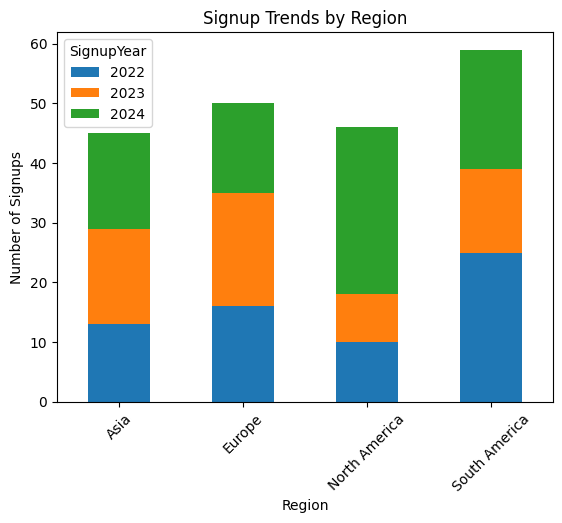

In [11]:
# Group by Region and Signup Year to observe trends in signups
region_signup_trends = cust_df.groupby(['Region', 'SignupYear']).size().unstack()

# Plot the trends
region_signup_trends.plot(kind='bar', stacked=True, title="Signup Trends by Region")

# Set labels and rotate the x-axis labels
plt.xlabel("Region")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()


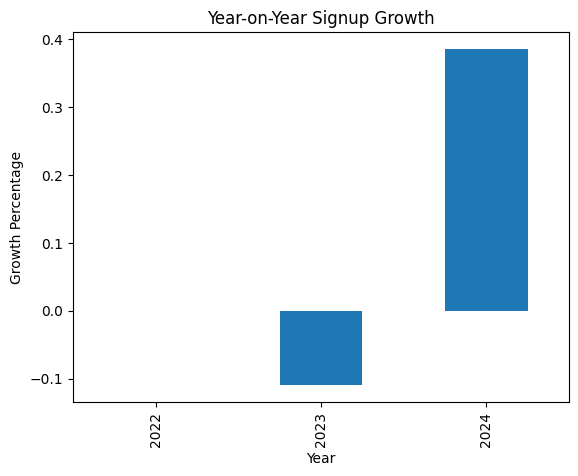

In [12]:
# Year-on-year signup growth
yearly_signups = cust_df.groupby('SignupYear').size()
yearly_signups.pct_change().plot(kind='bar', title="Year-on-Year Signup Growth")
plt.xlabel("Year")
plt.ylabel("Growth Percentage")
plt.show()


# EDA on Products.csv

In [13]:
prod_df = pd.read_csv('Products.csv')

In [14]:
prod_df.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [15]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [16]:
prod_df.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [17]:
# Missing values
print("Missing Values in Products data are ",prod_df.isnull().sum().sum())

# Duplicate entries
print("Duplicate Values in Products data are ",prod_df.duplicated().sum())


Missing Values in Products data are  0
Duplicate Values in Products data are  0


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


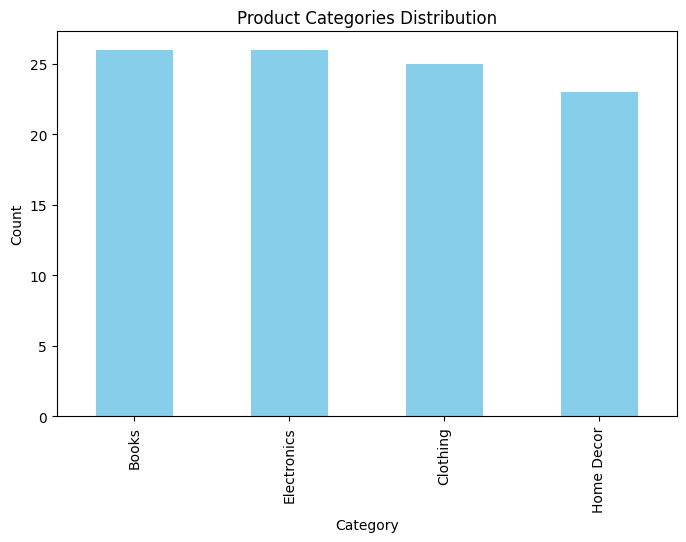

In [18]:
# Count products in each category
category_counts = prod_df['Category'].value_counts()
print(category_counts)

# Plot category distribution
category_counts.plot(kind='bar', title='Product Categories Distribution', color='skyblue', figsize=(8, 5))
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


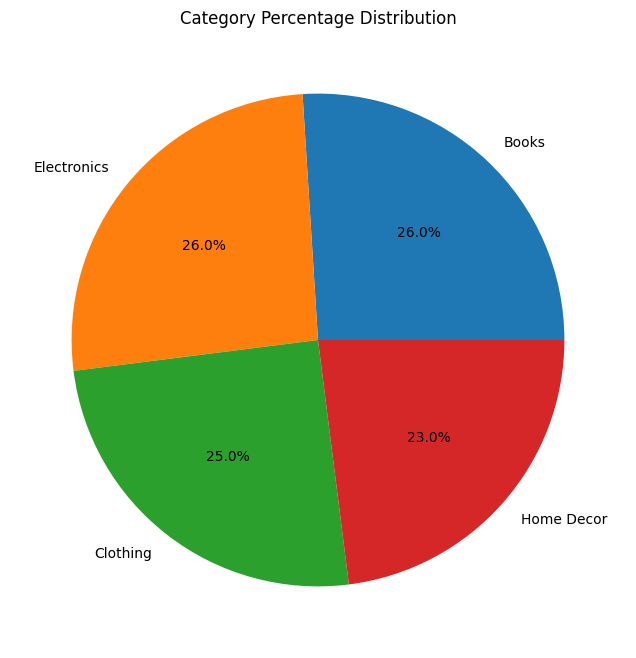

In [19]:
# Plot category percentage
prod_df['Category'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title='Category Percentage Distribution', figsize=(8, 8))
plt.ylabel('')
plt.show()


In [20]:
# Overall price statistics
print(prod_df['Price'].describe())

# Price distribution by category
category_price_stats = prod_df.groupby('Category')['Price'].describe()
print(category_price_stats)


count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64
             count        mean         std    min       25%     50%       75%  \
Category                                                                        
Books         26.0  292.212308  153.800135  33.59  154.2975  337.94  419.2125   
Clothing      25.0  263.720000  157.965038  18.82  126.3400  303.50  389.2000   
Electronics   26.0  275.353462  137.056612  16.08  168.8000  282.72  394.3650   
Home Decor    23.0  235.020000  122.236552  41.18  142.3800  235.58  314.9750   

                max  
Category             
Books        497.76  
Clothing     481.78  
Electronics  459.86  
Home Decor   454.53  


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


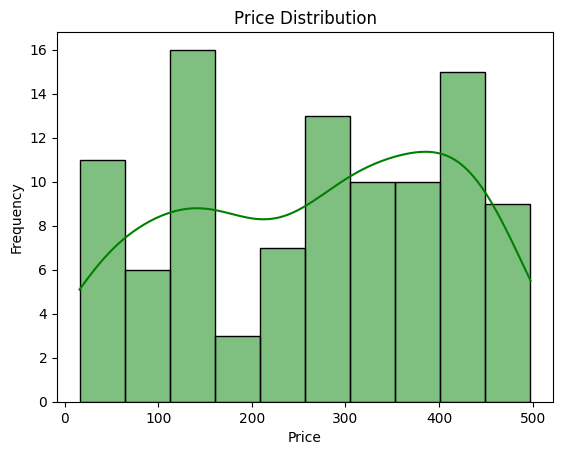

In [21]:
# Histogram of product prices
sns.histplot(prod_df['Price'], bins=10, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


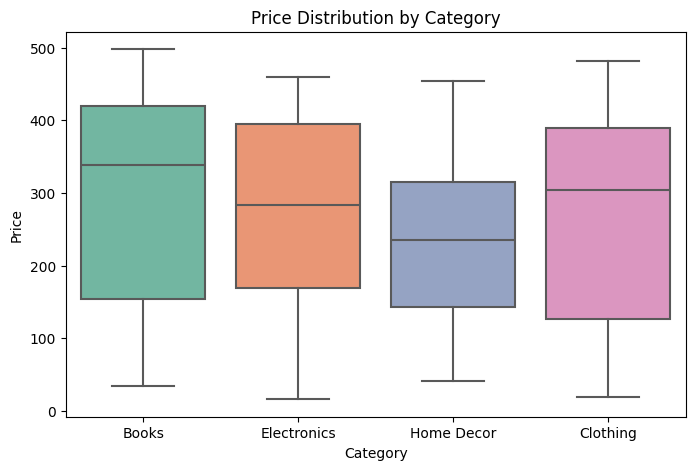

In [22]:
# Box plot of prices by category
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Price', data=prod_df, palette='Set2')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()


In [23]:
print(prod_df.nlargest(5, 'Price'))


   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


In [24]:
print(prod_df.nsmallest(5, 'Price'))


   ProductID               ProductName     Category  Price
55      P056      SoundWave Smartwatch  Electronics  16.08
43      P044  ActiveWear Running Shoes     Clothing  18.82
13      P014         ActiveWear Jacket     Clothing  26.26
72      P073      ComfortLiving Laptop  Electronics  26.99
34      P035        ActiveWear T-Shirt     Clothing  30.59


Category
Books          7597.52
Clothing       6593.00
Electronics    7159.19
Home Decor     5405.46
Name: Price, dtype: float64


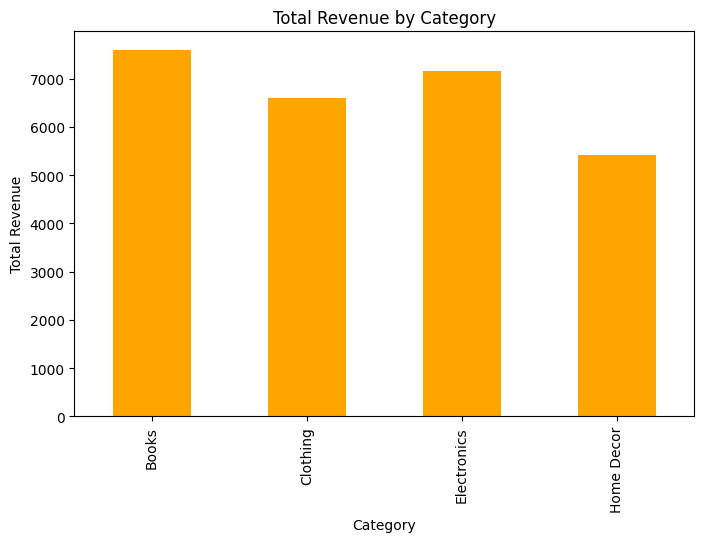

In [25]:
category_revenue = prod_df.groupby('Category')['Price'].sum()
print(category_revenue)

# Plot revenue by category
category_revenue.plot(kind='bar', title='Total Revenue by Category', color='orange', figsize=(8, 5))
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()


# EDA on Transactions.csv

In [26]:
trans_df = pd.read_csv('Transactions.csv')

In [27]:
trans_df.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [28]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [29]:
# Check for missing values
print("Missing Values in Transaction data are ",trans_df.isnull().sum().sum())

# Check for duplicate entries
print("Duplicated Values in Transaction data are ",trans_df.duplicated().sum())


Missing Values in Transaction data are  0
Duplicated Values in Transaction data are  0


In [30]:
trans_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [31]:
trans_df.describe(include='object')

,TransactionID,CustomerID,ProductID,TransactionDate
count,1000,1000,1000,1000
unique,1000,199,100,1000
top,T00001,C0109,P059,2024-08-25 12:38:23
freq,1,11,19,1


In [32]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


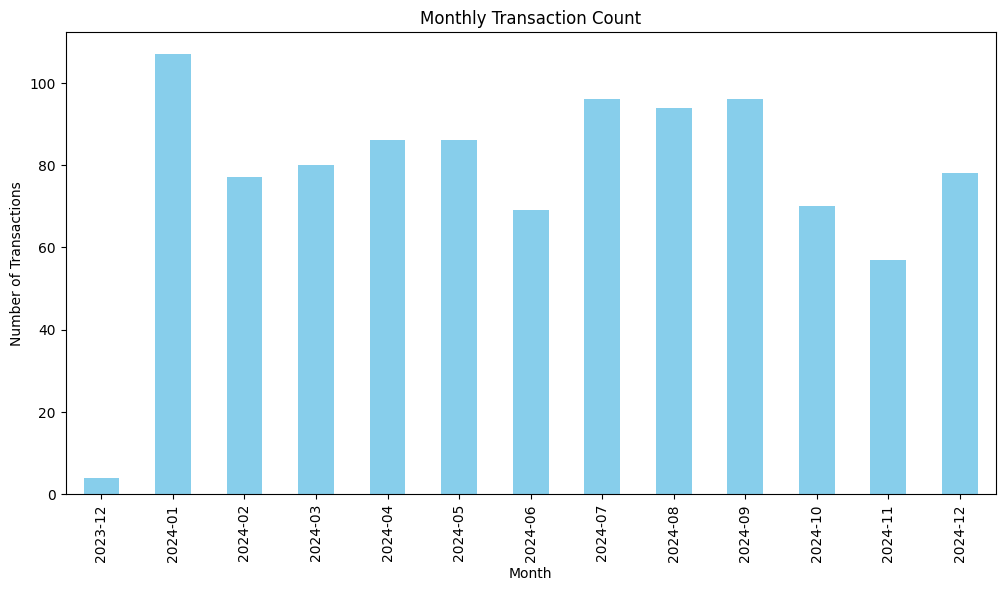

In [34]:
# Create month and week columns
trans_df['TransactionDate'] = pd.to_datetime(trans_df['TransactionDate'], errors='coerce')
trans_df['Month'] = trans_df['TransactionDate'].dt.to_period('M')
trans_df['Week'] = trans_df['TransactionDate'].dt.to_period('W')

# Monthly transaction count
monthly_count = trans_df.groupby('Month').size()
monthly_count.plot(kind='bar', figsize=(12, 6), title='Monthly Transaction Count', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


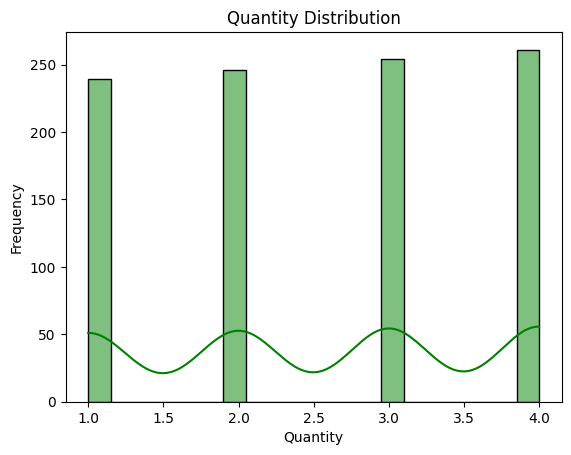

In [35]:
# Plot quantity distribution
sns.histplot(trans_df['Quantity'], bins=20, kde=True, color='green')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


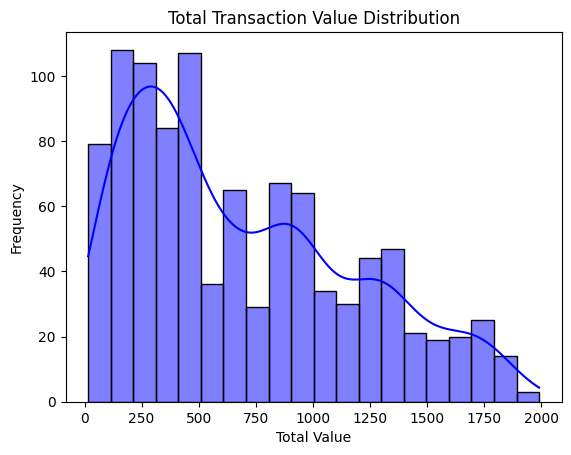

In [36]:
# Plot total value distribution
sns.histplot(trans_df['TotalValue'], bins=20, kde=True, color='blue')
plt.title('Total Transaction Value Distribution')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


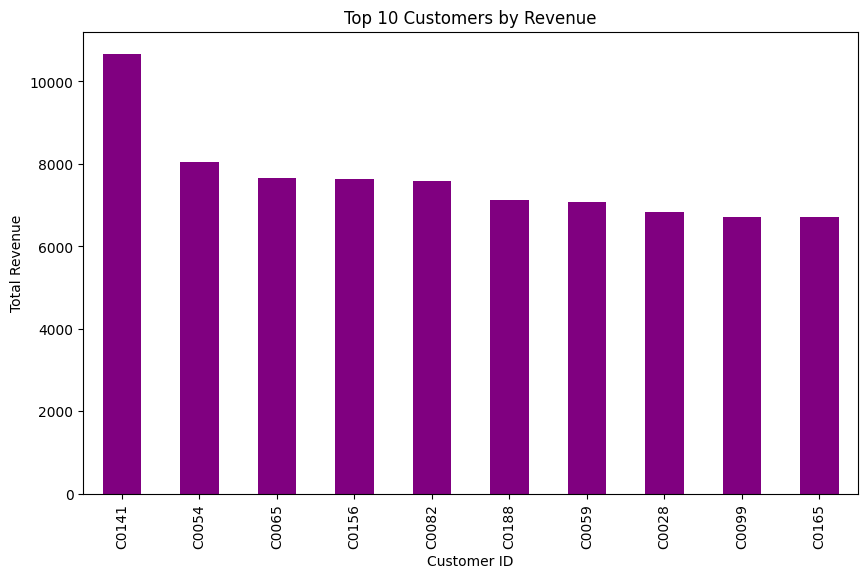

In [37]:
# Total revenue by customer
customer_revenue = trans_df.groupby('CustomerID')['TotalValue'].sum()
print(customer_revenue.sort_values(ascending=False).head(10))  # Top 10 customers

# Plot top 10 customers by revenue
customer_revenue.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()


ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


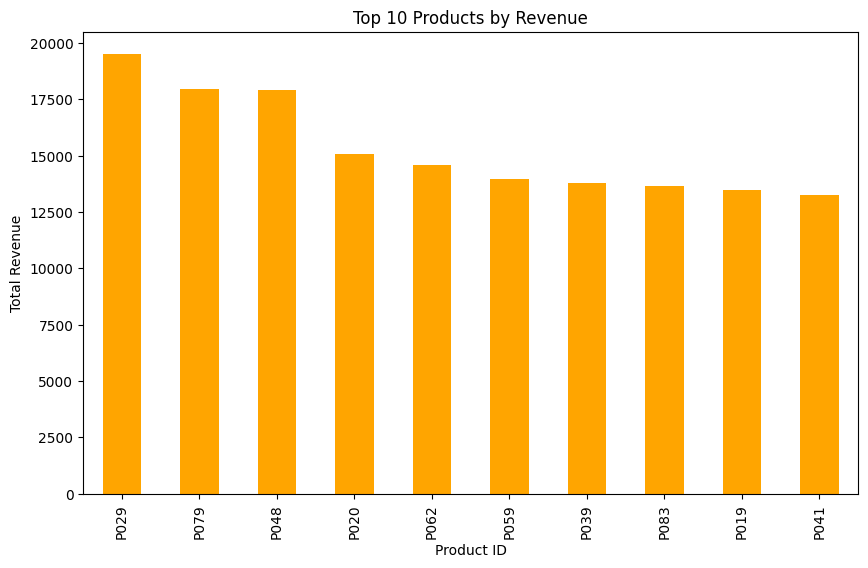

In [38]:
# Total revenue by product
product_revenue = trans_df.groupby('ProductID')['TotalValue'].sum()
print(product_revenue.sort_values(ascending=False).head(10))  # Top 10 products

# Plot top 10 products by revenue
product_revenue.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.show()


CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


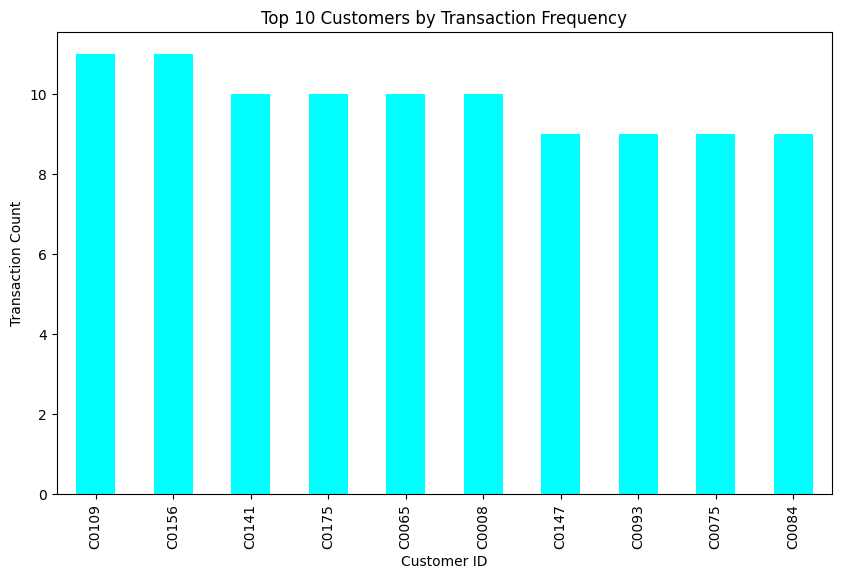

In [39]:
# Count of transactions per customer
customer_frequency = trans_df['CustomerID'].value_counts()
print(customer_frequency.head(10))  # Top 10 customers

# Plot top 10 frequent customers
customer_frequency.head(10).plot(kind='bar', figsize=(10, 6), color='cyan')
plt.title('Top 10 Customers by Transaction Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.show()


In [40]:
# Average transaction value per customer
avg_spend = trans_df.groupby('CustomerID')['TotalValue'].mean()
print(avg_spend.sort_values(ascending=False).head(10))  # Top 10 customers by average spend


CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
C0096    1214.584000
C0114    1156.086000
C0185    1141.440000
C0138    1122.050000
C0148    1091.558000
Name: TotalValue, dtype: float64


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


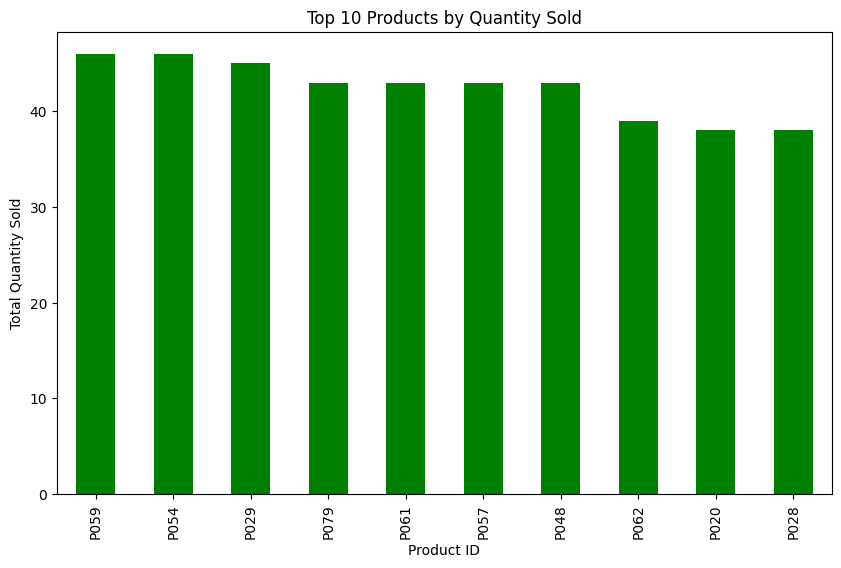

In [41]:
# Total quantity sold by product
product_quantity = trans_df.groupby('ProductID')['Quantity'].sum()
print(product_quantity.sort_values(ascending=False).head(10))  # Top 10 products

# Plot top 10 products by quantity sold
product_quantity.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18312\3194273492.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_quantity_per_price = trans_df.groupby(pd.cut(trans_df['Price'], bins=10))['Quantity'].mean()


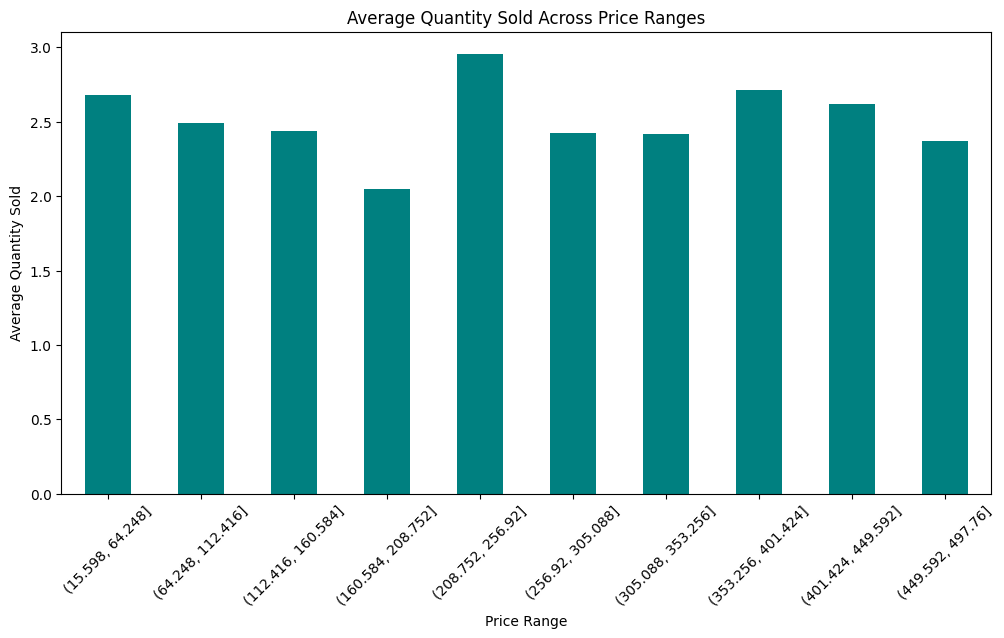

In [42]:
# Average quantity per price range
avg_quantity_per_price = trans_df.groupby(pd.cut(trans_df['Price'], bins=10))['Quantity'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
avg_quantity_per_price.plot(kind='bar', color='teal')
plt.title("Average Quantity Sold Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Average Quantity Sold")
plt.xticks(rotation=45)
plt.show()


## Insights between Customer & Transaction

In [45]:
customer_transaction_df=pd.merge(cust_df,trans_df,on="CustomerID",how="inner")
customer_transaction_df.sample(5)

,CustomerID,CustomerName,Region,SignupDate,SignupMonth,SignupMonthYear,SignupYear,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Month,Week
481,C0099,Rodney Eaton,South America,2023-01-29,1,2023-01,2023,T00621,P045,2024-04-19 05:04:38,2,963.56,481.78,2024-04,2024-04-15/2024-04-21
718,C0146,Brittany Harvey,Asia,2024-09-04,9,2024-09,2024,T00112,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,2024-05-27/2024-06-02
189,C0040,Michael Harrell,Asia,2022-03-07,3,2022-03,2022,T00154,P020,2023-12-31 06:53:54,4,1585.36,396.34,2023-12,2023-12-25/2023-12-31
188,C0040,Michael Harrell,Asia,2022-03-07,3,2022-03,2022,T00994,P072,2024-01-06 21:49:35,2,798.68,399.34,2024-01,2024-01-01/2024-01-07
51,C0011,Bryan Mathews,South America,2022-12-12,12,2022-12,2022,T00822,P055,2024-05-08 18:21:34,3,385.59,128.53,2024-05,2024-05-06/2024-05-12


### Top Regions By Revenue

In [47]:
region_revenue=customer_transaction_df.groupby("Region")["TotalValue"].sum().reset_index()
region_revenue=region_revenue.sort_values(by="TotalValue",ascending=False)
region_revenue

,Region,TotalValue
3,South America,219352.56
1,Europe,166254.63
2,North America,152313.40
0,Asia,152074.97


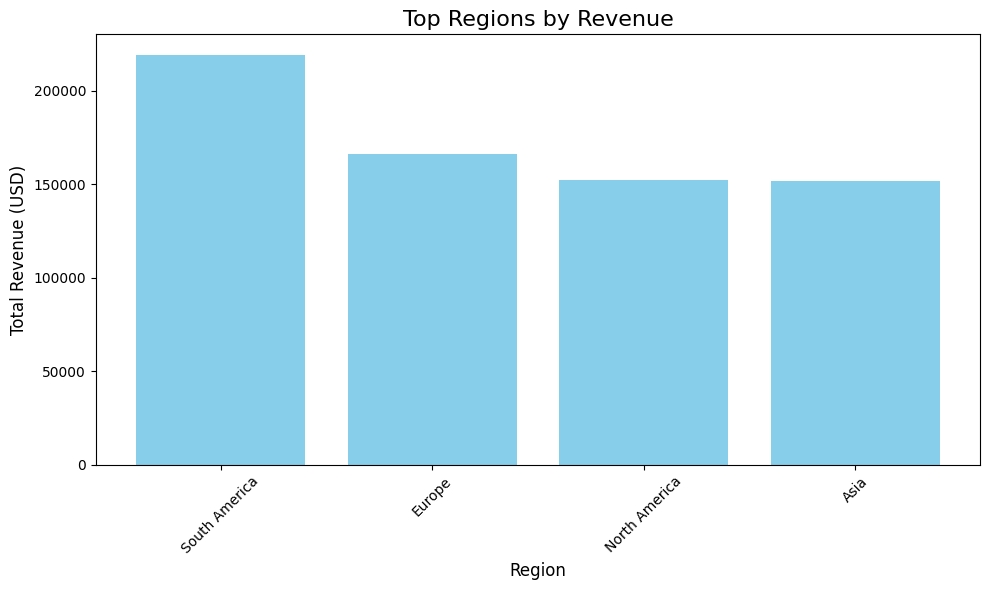

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(region_revenue["Region"], region_revenue["TotalValue"], color='skyblue')
plt.title("Top Regions by Revenue", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Customer Lifetime Value

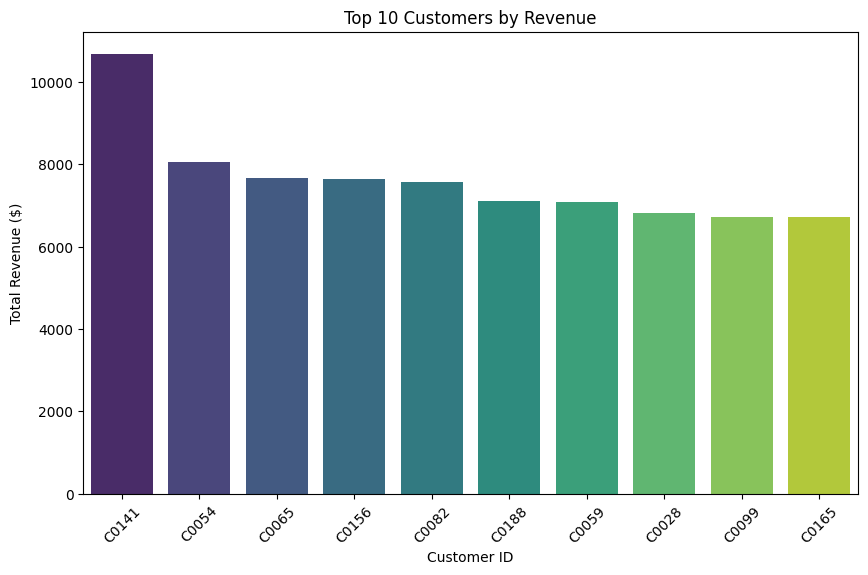

In [98]:
clv=customer_transaction_df.groupby("CustomerID")["TotalValue"].sum().reset_index()
clv=clv.sort_values(by="TotalValue",ascending=False)
clv=clv.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=clv, x='CustomerID', y='TotalValue', palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

## Insights Between Product and Transaction

In [56]:
product_transaction_df=pd.merge(prod_df,trans_df,on="ProductID",how="inner")
product_transaction_df.sample(5)

,ProductID,ProductName,Category,Price_x,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,Price_y,Month,Week
427,P045,SoundWave T-Shirt,Clothing,481.78,T00625,C0124,2024-07-02 09:34:25,2,963.56,481.78,2024-07,2024-07-01/2024-07-07
108,P012,ComfortLiving Headphones,Electronics,159.60,T00909,C0093,2024-01-01 14:29:52,2,319.20,159.60,2024-01,2024-01-01/2024-01-07
586,P059,SoundWave Jeans,Clothing,303.20,T00377,C0179,2024-01-22 19:36:33,1,303.20,303.20,2024-01,2024-01-22/2024-01-28
904,P089,HomeSense Bluetooth Speaker,Electronics,220.91,T00245,C0120,2024-04-28 20:01:47,4,883.64,220.91,2024-04,2024-04-22/2024-04-28
333,P036,BookWorld Jacket,Clothing,372.55,T00080,C0139,2024-04-09 07:47:04,1,372.55,372.55,2024-04,2024-04-08/2024-04-14


In [57]:
# Top Selling Products By quantity sold
top_products_quantity = product_transaction_df.groupby("ProductName")["Quantity"].sum().reset_index()
top_products_quantity = top_products_quantity.sort_values(by="Quantity", ascending=False)

top_products_quantity

,ProductName,Quantity
9,ActiveWear Smartwatch,100
47,SoundWave Headphones,97
36,HomeSense Desk Lamp,81
6,ActiveWear Rug,79
45,SoundWave Cookbook,78
...,...,...
37,HomeSense Headphones,18
50,SoundWave Laptop,16
48,SoundWave Jacket,16
22,BookWorld Wall Art,15


In [59]:
# Top Selling Products By Revenue Generated
top_products_revenue = product_transaction_df.groupby("ProductName")["TotalValue"].sum().reset_index()
top_products_revenue = top_products_revenue.sort_values(by="TotalValue", ascending=False)

top_products_revenue

,ProductName,TotalValue
9,ActiveWear Smartwatch,39096.97
47,SoundWave Headphones,25211.64
52,SoundWave Novel,24507.90
4,ActiveWear Jacket,22712.56
6,ActiveWear Rug,22314.43
...,...,...
26,ComfortLiving Desk Lamp,1694.16
44,SoundWave Bluetooth Speaker,1223.22
30,ComfortLiving Rug,1063.81
10,ActiveWear T-Shirt,795.34


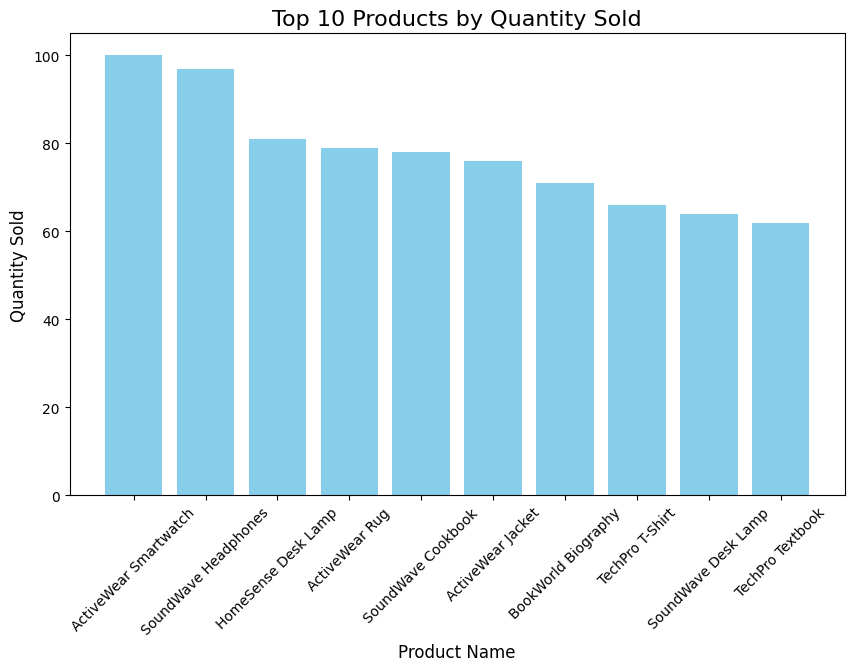

In [63]:
# Visualization for top-selling products (by quantity)
plt.figure(figsize=(10, 6))
plt.bar(top_products_quantity["ProductName"][:10], top_products_quantity["Quantity"][:10], color="skyblue")
plt.title("Top 10 Products by Quantity Sold", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()


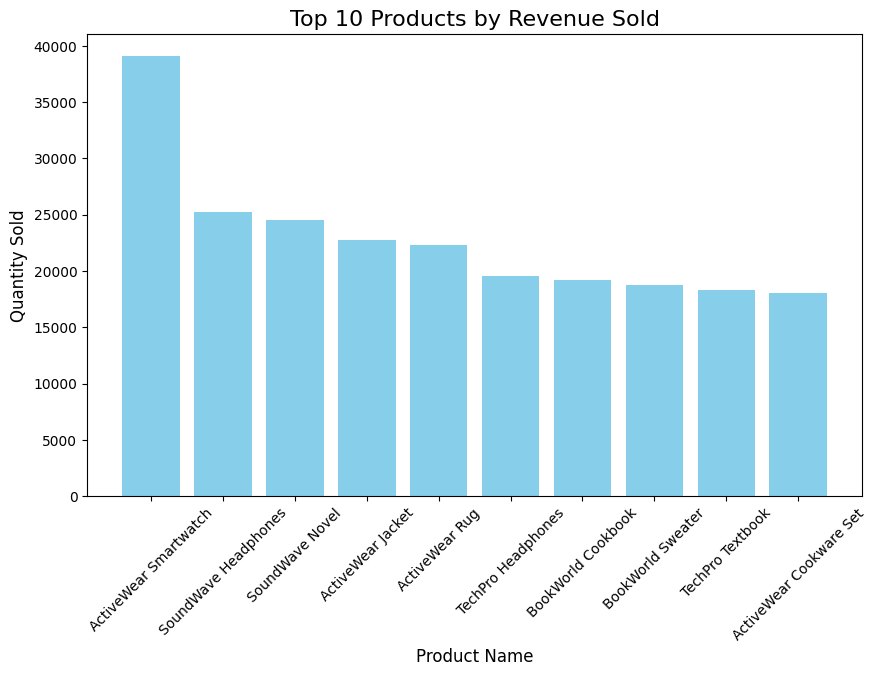

In [99]:
# Visualization for top-selling products (by quantity)
plt.figure(figsize=(10, 6))
plt.bar(top_products_revenue["ProductName"][:10], top_products_revenue["TotalValue"][:10], color="skyblue")
plt.title("Top 10 Products by Revenue Sold", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Category Performance


Revenue Contribution by Product Category:
      Category  TotalValue
0        Books   192147.47
2  Electronics   180783.50
1     Clothing   166170.66
3   Home Decor   150893.93


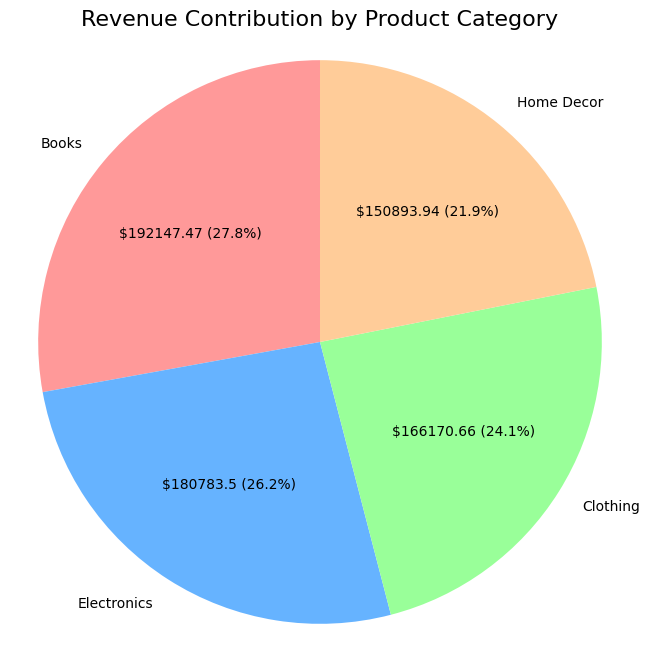

In [101]:
# 2. Category Performance
# -------------------------
category_performance = product_transaction_df.groupby("Category")["TotalValue"].sum().reset_index()
category_performance = category_performance.sort_values(by="TotalValue", ascending=False)

print("\nRevenue Contribution by Product Category:")
print(category_performance)

# Function to format the labels with both revenue and percentage
def format_func(pct, allvals):
    absolute = round(pct/100.*sum(allvals), 2)
    return f"${absolute} ({pct:.1f}%)"

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_performance['TotalValue'], labels=category_performance['Category'], 
        autopct=lambda pct: format_func(pct, category_performance['TotalValue']), 
        startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Revenue Contribution by Product Category', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Seasonal Trends in Product Sales


Seasonal Trends in Product Sales (Sample Data):
     Month     Category  Quantity
0  2023-12     Clothing         4
1  2023-12  Electronics         6
2  2023-12   Home Decor         2
3  2024-01        Books        76
4  2024-01     Clothing        54
5  2024-01  Electronics        65
6  2024-01   Home Decor        57
7  2024-02        Books        65
8  2024-02     Clothing        34
9  2024-02  Electronics        32


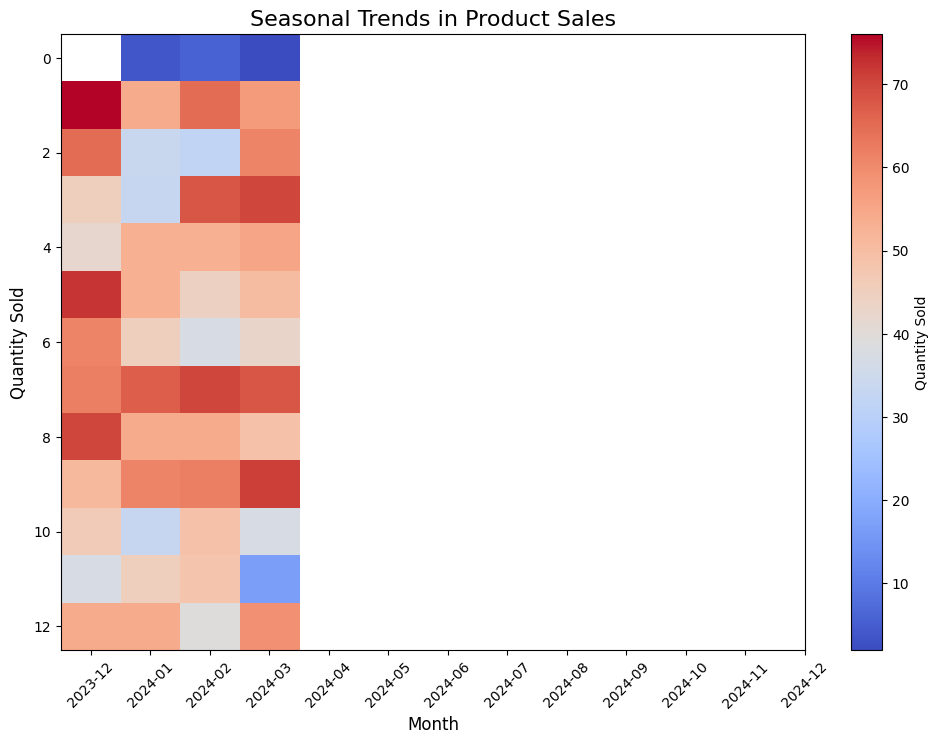

In [68]:
product_transaction_df["TransactionDate"] = pd.to_datetime(product_transaction_df["TransactionDate"])
product_transaction_df["Month"] = product_transaction_df["TransactionDate"].dt.to_period("M")

# Group by Month and Product Category
seasonal_trends = product_transaction_df.groupby(["Month", "Category"])["Quantity"].sum().reset_index()

print("\nSeasonal Trends in Product Sales (Sample Data):")
print(seasonal_trends.head(10))

# Optional: Pivot table for seasonal trends
seasonal_pivot = seasonal_trends.pivot(index="Month", columns="Category", values="Quantity")
plt.figure(figsize=(12, 8))
plt.title("Seasonal Trends in Product Sales", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.imshow(seasonal_pivot, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Quantity Sold")
plt.xticks(range(len(seasonal_pivot.index)), seasonal_pivot.index, rotation=45)
plt.show()

## Insights Between Customer , Product, Transaction

In [72]:
merged_data = pd.merge(trans_df, prod_df, on="ProductID", how="inner")
merged_data = pd.merge(merged_data, cust_df, on="CustomerID", how="inner")
merged_data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Month,Week,ProductName,Category,Price_y,CustomerName,Region,SignupDate,SignupMonth,SignupMonthYear,SignupYear
745,T00446,C0164,P035,2024-02-25 03:48:50,2,61.18,30.59,2024-02,2024-02-19/2024-02-25,ActiveWear T-Shirt,Clothing,30.59,Morgan Perez,Europe,2023-06-01,6,2023-06,2023
571,T00280,C0175,P048,2024-05-09 17:38:43,2,832.80,416.40,2024-05,2024-05-06/2024-05-12,TechPro Cookbook,Books,416.40,Matthew Johnson,Asia,2022-04-16,4,2022-04,2022
259,T00856,C0043,P051,2024-09-19 14:24:09,2,130.32,65.16,2024-09,2024-09-16/2024-09-22,ComfortLiving Desk Lamp,Home Decor,65.16,Sandy Short MD,Asia,2023-02-05,2,2023-02,2023
876,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,2024-12,2024-12-09/2024-12-15,TechPro Textbook,Books,497.76,Julia Palmer,Asia,2024-11-13,11,2024-11,2024
86,T00187,C0032,P069,2024-02-24 09:30:35,1,100.81,100.81,2024-02,2024-02-19/2024-02-25,BookWorld Biography,Books,100.81,Dustin Campbell,South America,2024-04-17,4,2024-04,2024


### Region-Specific Product Preferences

Region-Specific Product Preferences (Top Products by Region):
           Region     Category  Quantity
1            Asia     Clothing       166
3            Asia   Home Decor       142
2            Asia  Electronics       132
0            Asia        Books       120
7          Europe   Home Decor       167
4          Europe        Books       165
6          Europe  Electronics       144
5          Europe     Clothing       119
8   North America        Books       155
10  North America  Electronics       153
9   North America     Clothing       147
11  North America   Home Decor       138
12  South America        Books       241
14  South America  Electronics       198
15  South America   Home Decor       192
13  South America     Clothing       158


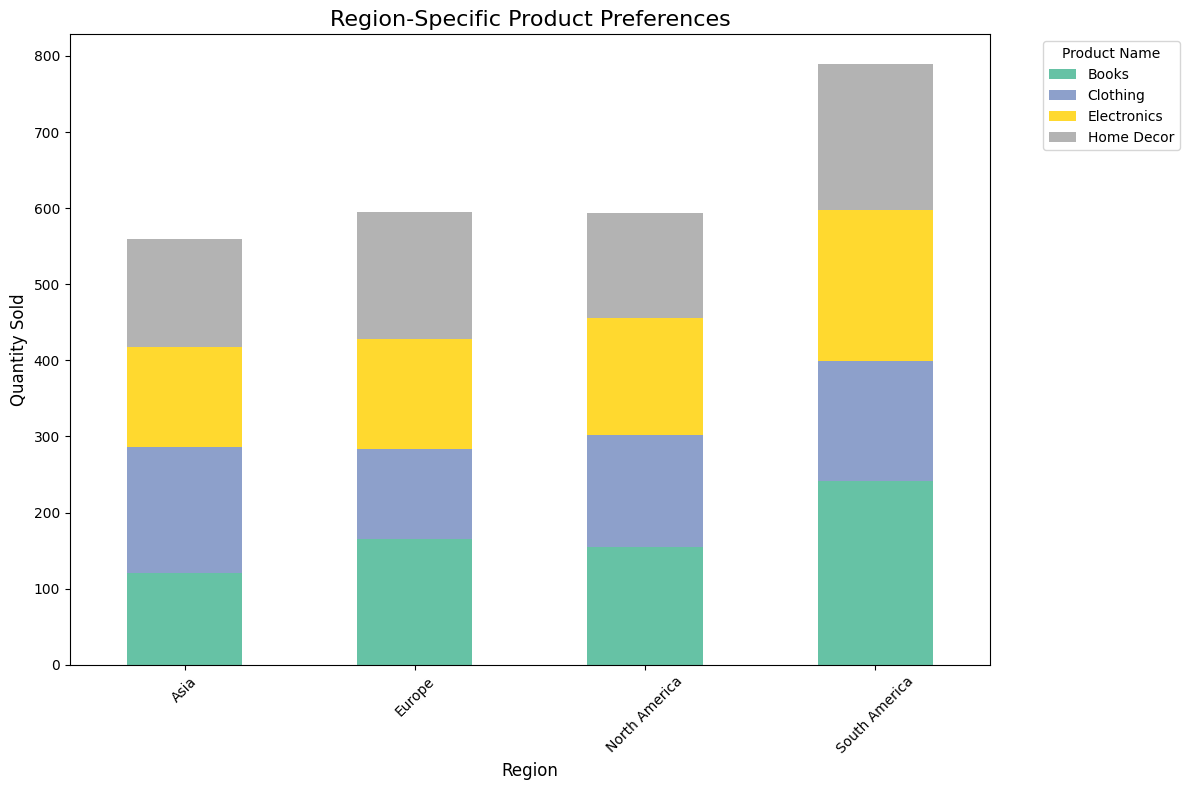

In [75]:
region_product_preferences = merged_data.groupby(["Region", "Category"])["Quantity"].sum().reset_index()
region_product_preferences = region_product_preferences.sort_values(by=["Region", "Quantity"], ascending=[True, False])

print("Region-Specific Product Preferences (Top Products by Region):")
print(region_product_preferences)

# Visualization of top products by region
top_products_by_region = region_product_preferences.pivot(index="Region", columns="Category", values="Quantity")
top_products_by_region.plot(kind="bar", figsize=(12, 8), stacked=True, colormap="Set2")
plt.title("Region-Specific Product Preferences", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Customer Segmentation by Spending:


SpendingCategory
Low Spend            1
Medium Spend         5
High Spend          12
Very High Spend    181
Name: count, dtype: int64


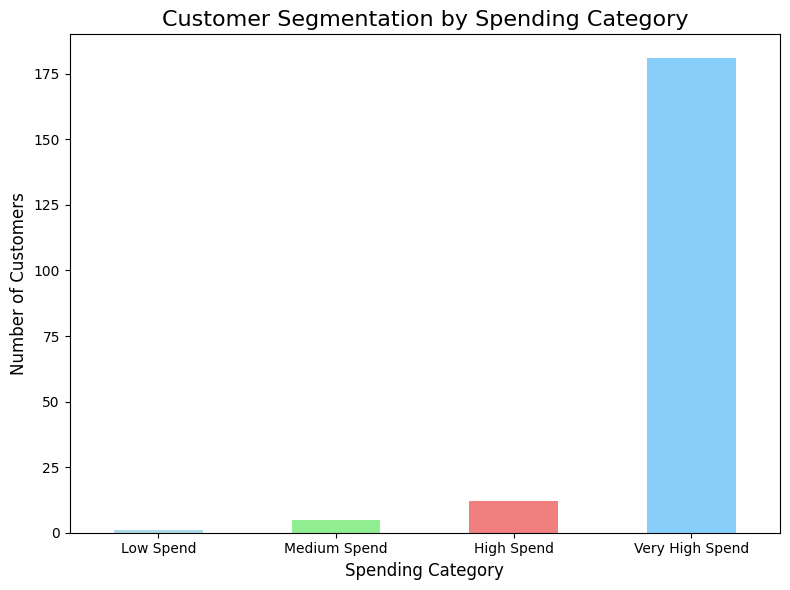

In [94]:
customer_spending = merged_data.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_spending = customer_spending.sort_values(by="TotalValue", ascending=False)

# Segment customers into high, medium, low spenders
customer_spending["SpendingCategory"] = pd.cut(
    customer_spending["TotalValue"],
    bins=[0, 100, 500, 1000, float("inf")],
    labels=["Low Spend", "Medium Spend", "High Spend", "Very High Spend"],
    right=False,
)

category_counts = customer_spending['SpendingCategory'].value_counts().sort_index()
print(category_counts)
# Plotting the distribution of customer segments
plt.figure(figsize=(8, 6))
category_counts.plot(kind="bar", color=["lightblue", "lightgreen", "lightcoral", "lightskyblue"])
plt.title("Customer Segmentation by Spending Category", fontsize=16)
plt.xlabel("Spending Category", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Cross-Sell Opportunities:

In [77]:
# Find product pairs purchased together by customers
cross_sell_data = merged_data.groupby(["CustomerID", "ProductName"])["Quantity"].sum().reset_index()
cross_sell_pairs = pd.merge(cross_sell_data, cross_sell_data, on="CustomerID", suffixes=("_1", "_2"))
cross_sell_pairs = cross_sell_pairs[cross_sell_pairs["ProductName_1"] != cross_sell_pairs["ProductName_2"]]

# Calculate cross-sell count
cross_sell_pairs["CrossSellCount"] = cross_sell_pairs.groupby(["ProductName_1", "ProductName_2"])["Quantity_1"].transform("sum")
cross_sell_pairs = cross_sell_pairs.drop_duplicates(subset=["ProductName_1", "ProductName_2"])

print("\nTop Cross-Sell Opportunities (Sample):")
print(cross_sell_pairs[["ProductName_1", "ProductName_2", "CrossSellCount"]].sort_values(by="CrossSellCount", ascending=False).head(10))


Top Cross-Sell Opportunities (Sample):
                 ProductName_1            ProductName_2  CrossSellCount
837            TechPro T-Shirt      BookWorld Biography              25
831        BookWorld Biography          TechPro T-Shirt              24
775          ActiveWear Jacket      HomeSense Desk Lamp              20
49       ActiveWear Smartwatch  ActiveWear Cookware Set              20
1208        SoundWave Cookbook      ActiveWear Textbook              20
3418  ActiveWear Running Shoes       SoundWave Cookbook              19
2875  ActiveWear Running Shoes       TechPro Headphones              19
2        ActiveWear Smartwatch       SoundWave Cookbook              18
589       SoundWave Headphones        BookWorld Sweater              18
782      ActiveWear Smartphone          HomeSense Novel              18


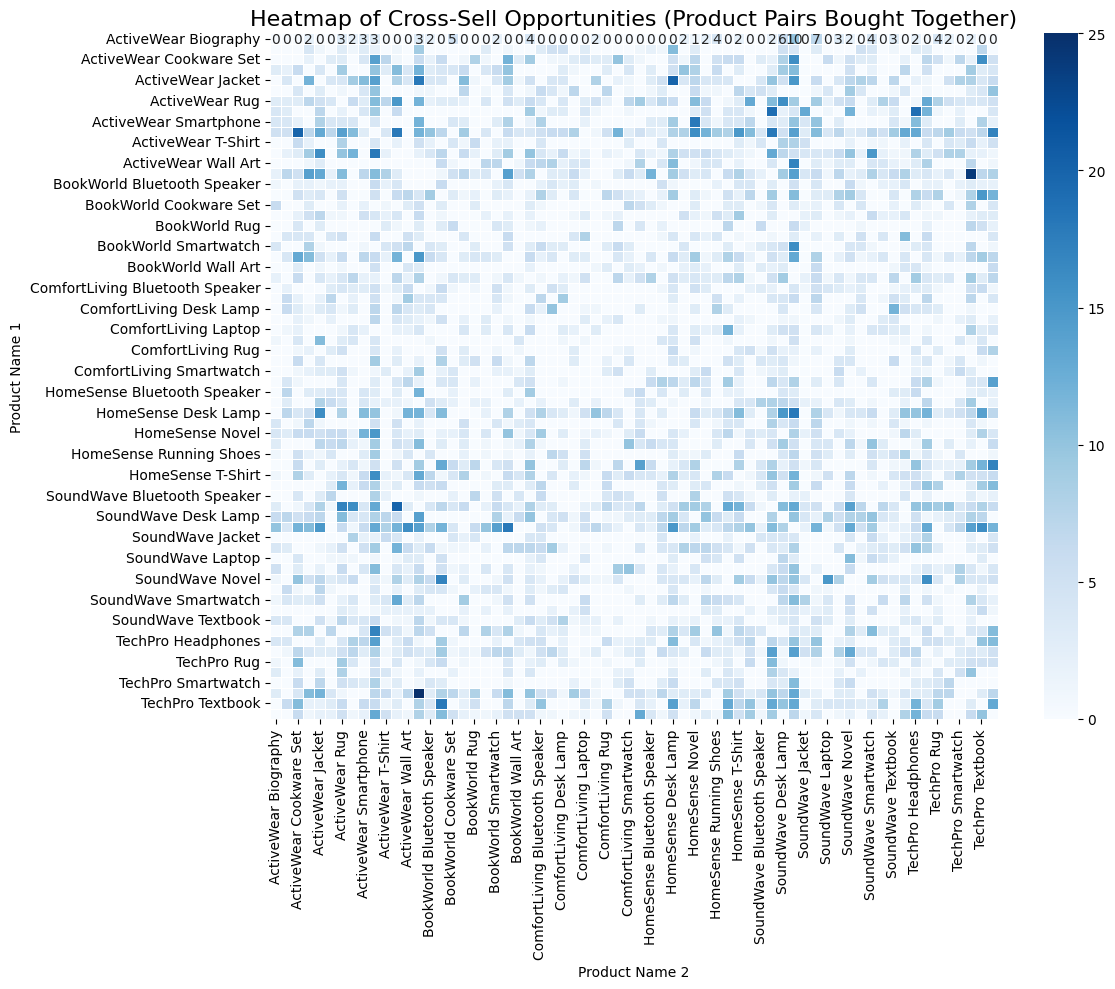

In [96]:
cross_sell_matrix = cross_sell_pairs.pivot_table(
    index="ProductName_1", 
    columns="ProductName_2", 
    values="CrossSellCount", 
    aggfunc="sum", 
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cross_sell_matrix, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

# Title and labels
plt.title('Heatmap of Cross-Sell Opportunities (Product Pairs Bought Together)', fontsize=16)
plt.xlabel('Product Name 2')
plt.ylabel('Product Name 1')

# Display the plot
plt.tight_layout()
plt.show()